# ATM Fraud Detection

1. To Detect Wheather a transaction is fraudulent or not
2. Dataset was generated through random sampling of ATM transactions logs
3. Information is highly sensitive, so random selection was the only available choice.
4. Ten Accounts were sampled over a period ranging from 1:30 pm January 10th 2021 to 4:50 AM February 20th 2021
5. Because of the sensitive nature of the information, data was normalised from source
6.  x' = (x - x_min)/(x_max - x_min)

In [ ]:
IMPORTING REQUIRED LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import pandas as pd2

from sklearn.model_selection import train_test_split

##Loading models into memeory:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

##Loading evaluation tools into memeory:
from sklearn import model_selection
from sklearn. preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

 Importing Dataset...

In [4]:
atm = pd.read_csv('atm.csv')
atm2 = pd2.read_csv('atm2.csv')

Analysing Dataset...

In [5]:
#Importing Dataset:
atm.head(10)

,time,ac,dist,amount,fraud
0,0.000000,0,0.000000,0.595960,0
1,0.188437,0,0.249825,0.010101,0
2,0.029979,0,0.000000,0.090909,0
3,0.117773,0,0.332596,0.696970,0
4,0.578158,0,0.000000,0.020202,0
5,0.057816,0,0.080754,0.141414,0
6,0.053533,0,0.256553,0.595960,0
7,0.149893,1,0.252857,0.040404,0
8,0.139186,0,0.003890,0.898990,0
9,0.027837,0,0.256553,0.000000,1


In [6]:
atm.tail(10)

,time,ac,dist,amount,fraud
989,0.025696,0,0.000000,0.393939,0
990,0.023555,0,0.331992,0.030303,1
991,0.220557,0,0.250538,1.000000,0
992,0.000000,1,0.001691,1.000000,0
993,0.055675,0,0.084704,0.000000,0
994,0.301927,0,0.335556,0.494949,0
995,0.102784,0,0.004808,0.292929,0
996,0.751606,0,0.248061,0.141414,0
997,0.032120,0,0.003962,0.595960,1
998,0.098501,0,0.005170,0.010101,0


There are a total of 999 records in the dataset

In [7]:
#Information about the dataset
atm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    999 non-null    float64
 1   ac      999 non-null    int64  
 2   dist    999 non-null    float64
 3   amount  999 non-null    float64
 4   fraud   999 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 39.1 KB


1. Information reveals that there are no missing data in the dataset
2. There are two integer data type and three float data types
3. 5 columns exist in the dataset

Distribution of Transaction

In [8]:
atm['fraud'].value_counts()

0    782
1    217
Name: fraud, dtype: int64

The Dataset is Unbalanced:
1. 0 ---> Normal Transaction
2. 1 ---> Fraudulent 
3. We have to find a way to balance the data

Preprocessing the Dataset to balance the normal and fradulent transactions
1. Seperate the Normal Transaction from the dataset

In [9]:
normal = atm[atm.fraud == 0]
normal2 = atm2[atm2.fraud == 0]

Preprocessing the Dataset to balance the normal and fradulent transactions
2. Seperate the Fraudulent Transaction from the dataset

In [10]:
fraud = atm[atm.fraud == 1]
fraud2 = atm2[atm2.fraud == 1]

Statistical measures about the data:

In [11]:
print(normal2.shape)
print(fraud2.shape)

(782, 5)
(217, 5)


In [12]:
normal2.amount.describe()

count       782.000000
mean      37203.324808
std       33308.257837
min        1000.000000
25%        5000.000000
50%       30000.000000
75%       70000.000000
max      100000.000000
Name: amount, dtype: float64

1. There are a total of 782 valid transaction
2. Average amount withdrawn for valid normal transaction is =N= 37, 203 within the period


In [13]:
fraud2.amount.describe()

count       217.000000
mean      37115.207373
std       32727.135064
min        1000.000000
25%        5000.000000
50%       30000.000000
75%       60000.000000
max      100000.000000
Name: amount, dtype: float64

1. There are a total of 217 fradulent transactions in the dataset
2. Average amount withdrawn for fraudulent transaction is approximatly =N= 37, 115 within the period


In [14]:
##Comparing both transactions:
atm2.groupby('fraud').mean()

,time,ac,dist,amount
fraud,,,,
0,0.154797,0.074169,0.144082,37203.324808
1,0.018078,0.198157,0.205711,37115.207373


UNDER-SAMPLING

1. Build a sample dataset containing similar distribution of normal transaction and fraudulent transaction
2. Number of fradulent transaction = 217

In [15]:
normal_sample = normal.sample(n = 217)

This will randomly select 217 normal samples to equal the number of fraudulent samples

Next, concatinate the two dataframes:

In [16]:
new_atm = pd.concat([normal_sample, fraud], axis=0)

In [17]:
new_atm.head()

,time,ac,dist,amount,fraud
369,0.081370,0,0.333321,0.141414,0
208,0.096360,0,0.000000,0.191919,0
734,0.132762,1,0.000000,0.797980,0
545,0.184154,0,0.248146,0.898990,0
424,0.044968,0,0.085610,0.010101,0


In [18]:
new_atm.tail()

,time,ac,dist,amount,fraud
978,0.032120,0,0.084765,0.898990,1
980,0.004283,0,0.253594,0.090909,1
981,0.012848,0,0.256553,0.090909,1
990,0.023555,0,0.331992,0.030303,1
997,0.032120,0,0.003962,0.595960,1


In [19]:
new_atm['fraud'].value_counts()

1    217
0    217
Name: fraud, dtype: int64

In [20]:
new_atm.groupby('fraud').mean()

,time,ac,dist,amount
fraud,,,,
0,0.143548,0.073733,0.143402,0.37681
1,0.018078,0.198157,0.205711,0.36480


SPLITTING THE DATA INTO FEATURES AND TARGET


In [21]:
X = new_atm.drop(columns='fraud', axis=1)
Y = new_atm['fraud']

In [22]:
print(X)

         time  ac      dist    amount
369  0.081370   0  0.333321  0.141414
208  0.096360   0  0.000000  0.191919
734  0.132762   1  0.000000  0.797980
545  0.184154   0  0.248146  0.898990
424  0.044968   0  0.085610  0.010101
..        ...  ..       ...       ...
978  0.032120   0  0.084765  0.898990
980  0.004283   0  0.253594  0.090909
981  0.012848   0  0.256553  0.090909
990  0.023555   0  0.331992  0.030303
997  0.032120   0  0.003962  0.595960

[434 rows x 4 columns]


In [23]:
print(Y)

369    0
208    0
734    0
545    0
424    0
      ..
978    1
980    1
981    1
990    1
997    1
Name: fraud, Length: 434, dtype: int64


SPLITTING THE FEATURES AND LABELS INTO TRAINING AND TEST DATASETS:

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,stratify=Y,random_state=2)

In [25]:
print(X.shape, Y_train.shape, X_train.shape)

(434, 4) (347,) (347, 4)


MODEL TRAINING
1. Logistic Regrssion 

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, Y_train)

LogisticRegression()

MODEL EVALUATION
1. Accuracy Score of Training Data
2. Accuracy Score of Test Data

In [28]:
#Accuracy on training data:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8270893371757925


In [30]:
#Accuracy on testing data:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy on testing data : ', test_data_accuracy)

Accuracy on testing data :  0.8620689655172413


In [32]:
confusion_matrix(X_test_prediction, Y_test)

array([[36,  4],
       [ 8, 39]], dtype=int64)

In [33]:
matrix=classification_report(X_test_prediction, Y_test)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        40
           1       0.91      0.83      0.87        47

    accuracy                           0.86        87
   macro avg       0.86      0.86      0.86        87
weighted avg       0.87      0.86      0.86        87



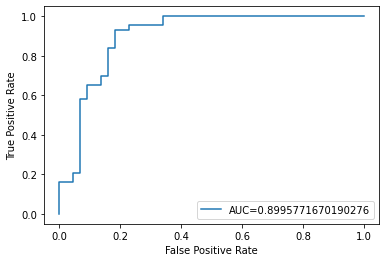

In [34]:
y_pred_proba = model.predict_proba(X_test)[::,1]
logis_fpr, logis_tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
logis_auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(logis_fpr,logis_tpr,label="AUC="+str(logis_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [35]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.515 (0.037)


# Evaluation models: KNN

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [37]:
#Accuracy on testing data: using KNN model
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print('Accuracy on testing data : ', test_data_accuracy)

Accuracy on testing data :  0.9080459770114943


In [39]:
confusion_matrix(X_test_prediction, Y_test)

array([[37,  1],
       [ 7, 42]], dtype=int64)

In [40]:
matrix=classification_report(X_test_prediction, Y_test)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        38
           1       0.98      0.86      0.91        49

    accuracy                           0.91        87
   macro avg       0.91      0.92      0.91        87
weighted avg       0.92      0.91      0.91        87



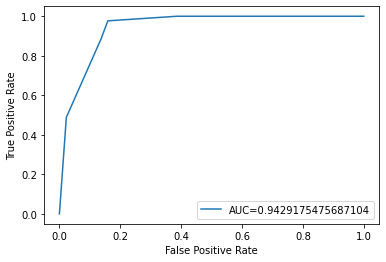

In [41]:
#define metrics
y_pred_proba = knn.predict_proba(X_test)[::,1]
knn_fpr, knn_tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
knn_auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(knn_fpr,knn_tpr,label="AUC="+str(knn_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [42]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(knn, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -1.068 (0.692)


# Evaluation Model: SVM

In [43]:
X2 = atm.drop(columns='fraud', axis=1)
Y2 = atm['fraud']
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,test_size=.3,stratify=Y2,random_state=2)
print(X2.shape, Y2_train.shape, X2_train.shape)

(999, 4) (699,) (699, 4)


In [44]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', random_state = 5, probability=True) 
#clf=svm.SVC(probability=True)

In [45]:
clf.fit(X2_train, Y2_train)

SVC(kernel='linear', probability=True, random_state=5)

In [46]:
#Accuracy on testing data: using KNN model
X_test_prediction = clf.predict(X2_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y2_test)

In [47]:
print('Accuracy on testing data : ', test_data_accuracy)

Accuracy on testing data :  0.8033333333333333


In [48]:
confusion_matrix(X_test_prediction, Y2_test)

array([[231,  55],
       [  4,  10]], dtype=int64)

In [49]:
matrix=classification_report(X_test_prediction, Y2_test)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89       286
           1       0.15      0.71      0.25        14

    accuracy                           0.80       300
   macro avg       0.57      0.76      0.57       300
weighted avg       0.94      0.80      0.86       300



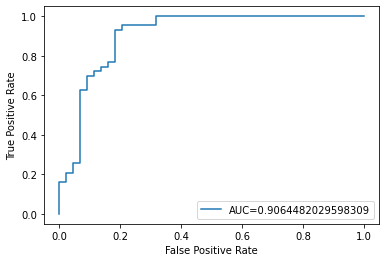

0.9064482029598309


In [50]:
from sklearn.metrics import roc_curve, auc
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
svm_fpr, svm_tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
#fpr, tpr,threshold = roc_curve(Y_test, y_pred_proba)
auc_svm = auc(svm_fpr, svm_tpr)

#create ROC curve
#plt.figure(figsize=(5,5), dpi=100)
plt.plot(svm_fpr,svm_tpr,label="AUC="+str(auc_svm))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

print(auc_svm)

In [51]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(clf, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.295 (0.155)


# Evaluation Model: Naiv bay

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X2_train, Y2_train)

GaussianNB()

In [53]:
#Accuracy on testing data: using KNN model
X_test_prediction = gnb.predict(X2_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y2_test)
print('Accuracy on testing data : ', test_data_accuracy)

Accuracy on testing data :  0.9333333333333333


In [54]:
confusion_matrix(X_test_prediction, Y2_test)

array([[223,   8],
       [ 12,  57]], dtype=int64)

In [55]:
matrix=classification_report(X_test_prediction, Y2_test)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       231
           1       0.88      0.83      0.85        69

    accuracy                           0.93       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.93      0.93      0.93       300



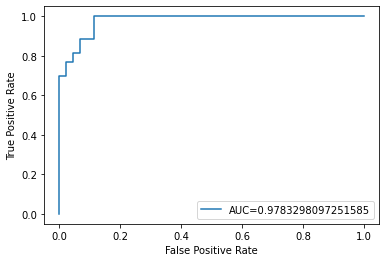

In [56]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [57]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(gnb, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.179 (0.072)


# Evaluation Model: Decission Tree

In [58]:
dst = DecisionTreeClassifier(criterion="entropy", max_depth=1)
dst.fit(X2_train, Y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [59]:
#Accuracy on testing data: using KNN model
X_test_prediction = dst.predict(X2_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y2_test)
print('Accuracy on testing data : ', test_data_accuracy)

Accuracy on testing data :  0.9566666666666667


In [60]:
confusion_matrix(X_test_prediction, Y2_test)

array([[222,   0],
       [ 13,  65]], dtype=int64)

In [61]:
matrix=classification_report(X_test_prediction, Y2_test)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       222
           1       1.00      0.83      0.91        78

    accuracy                           0.96       300
   macro avg       0.97      0.92      0.94       300
weighted avg       0.96      0.96      0.96       300



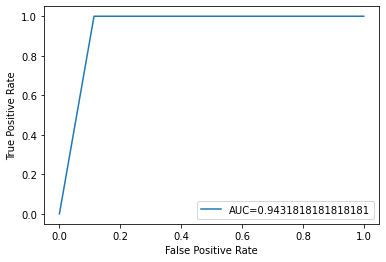

In [62]:
y_pred_proba = dst.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [63]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(dst, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.136 (0.057)


# Evaluation mnodel: Random Forest

In [64]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 100)
regressor.fit(X2_train, Y2_train)

RandomForestRegressor(n_estimators=10, random_state=100)

In [65]:
#Accuracy on testing data: using KNN model
X_test_prediction = regressor.predict(X2_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y2_test)
print('Accuracy on testing data : ', test_data_accuracy)

Accuracy on testing data :  1.0


In [66]:
confusion_matrix(X_test_prediction, Y2_test)

array([[235,   0],
       [  0,  65]], dtype=int64)

In [67]:
matrix=classification_report(X_test_prediction, Y2_test)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       235
         1.0       1.00      1.00      1.00        65

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# Visualizing Random Foreste Prediction:

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 1 

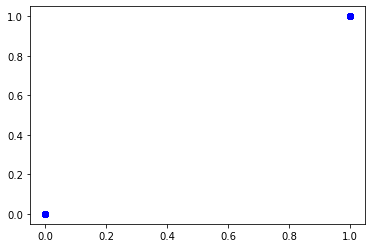

In [68]:
# Visualising the Random Forest Regression results
  
# arange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(X_test_prediction), max(X_test_prediction), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(X_test_prediction, Y2_test, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Fraud')
plt.show()

In [69]:
y_pred_proba = regressor.predict_proba(X2_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y2_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y2_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

# Ploting the ROC Curve

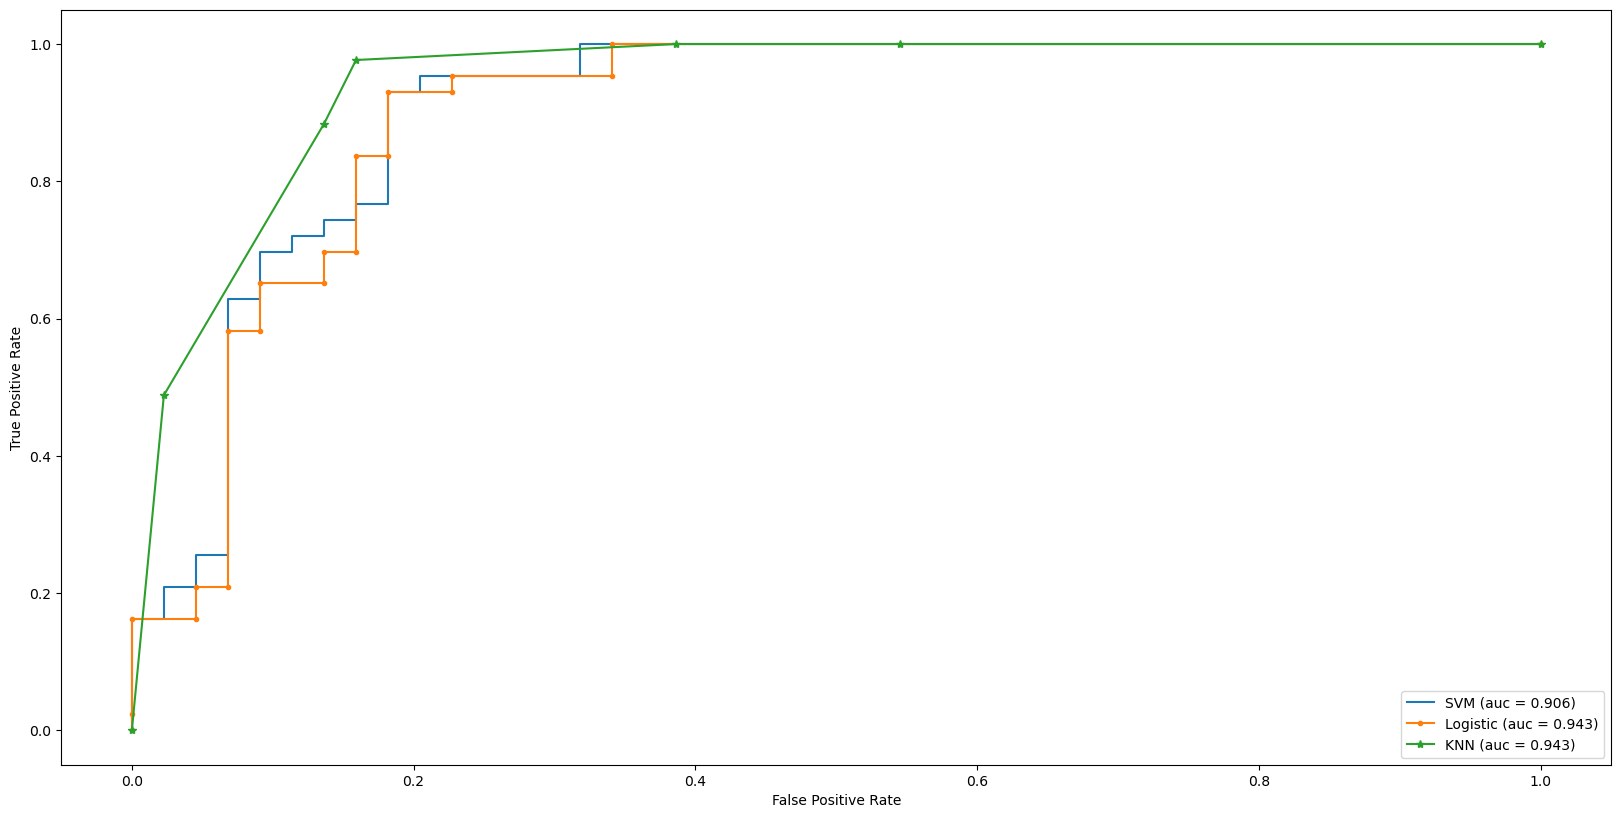

In [70]:
#create ROC curve
plt.figure(figsize=(20, 10), dpi=100)
#plt.plot(logis_fpr,logis_tpr,label="AUC="+str(logis_auc))
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logis_fpr, logis_tpr, marker='.', label='Logistic (auc = %0.3f)' % knn_auc)
plt.plot(knn_fpr, knn_tpr, marker='*', label='KNN (auc = %0.3f)' % knn_auc)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [71]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []

In [72]:
#Defining 5 Logistic Regression Models
model11 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic1', model11))
model12 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic2', model12))
model13 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic3', model13))
model14 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic4', model14))
model15 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic5', model15))

In [73]:
#Defining 5 Support Vector Classifiers
model21 = SVC(kernel = 'linear')
estimators.append(('svm1', model21))
model22 = SVC(kernel = 'poly')
estimators.append(('svm2', model22))
model23 = SVC(kernel = 'rbf')
estimators.append(('svm3', model23))
model24 = SVC(kernel = 'rbf')
estimators.append(('svm4', model24))
model25 = SVC(kernel = 'linear')
estimators.append(('svm5', model25))

In [74]:
#Defining 5 K-NN classifiers
model26 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn1', model26))
model27 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn2', model27))
model28 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn3', model28))
model29 = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
estimators.append(('knn4', model29))
model30 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
estimators.append(('knn5', model30))

In [75]:
# Defining the ensemble model
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, Y_train)
y_pred = ensemble.predict(X_test)

In [83]:
#Confisuin matrix
cm_HybridEnsembler = confusion_matrix(Y_test, y_pred)
confusion_matrix(y_pred, Y_test)

array([[35,  1],
       [ 9, 42]], dtype=int64)

In [84]:
#Cross-Validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(ensemble, X_train, Y_train, cv=kfold)
print(results.mean())
#Output:-

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.8266386554621847


In [82]:
confusion_matrix(y_pred, Y_test)

array([[35,  1],
       [ 9, 42]], dtype=int64)

In [ ]:
#define metrics
y_pred_proba = knn.predict_proba(X_test)[::,1]
knn_fpr, knn_tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
knn_auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(knn_fpr,knn_tpr,label="AUC="+str(knn_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [86]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = ensemble.predict_proba(valid_features)
probs = probs[:, 1]
auc = roc_auc_score(valid_y, probs)
fpr, tpr, thresholds = roc_curve(valid_y, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",auc)

AttributeError: predict_proba is not available when voting='hard'